# function to read a csv

In [1]:
import pandas as pd

def read_csv_to_dataframe(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print("An error occurred:", e)
        return None

In [2]:
scaled_df = read_csv_to_dataframe("/home/nalin21478/ML-Flight-Delay-Prediction/Code/smoted_data.csv")

In [3]:
scaled_df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEST,CRS_ELAPSED_TIME,DISTANCE,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,DEP_DELAY,Delayed
0,11,1,5,10,-0.848855,-0.711515,0.761435,0.184485,-0.038486,15,2.069328,2.821704,-0.727985,3,-2.330480,-1.390801,-1,0
1,11,1,5,28,1.217334,1.354774,0.761435,0.184485,-0.038486,15,2.069328,2.821704,-0.727985,3,-2.330480,-1.390801,-7,0
2,11,1,5,20,-0.372043,-0.224999,0.761435,0.184485,-0.038486,15,2.069328,2.821704,-0.727985,3,-2.330480,-1.390801,40,1
3,11,1,5,30,-0.480789,-0.365448,0.761435,0.184485,-0.038486,15,2.069328,2.821704,-0.727985,3,-2.330480,-1.390801,-2,0
4,11,1,5,1,-0.723378,-0.572189,0.494669,0.002399,-0.038486,15,1.907431,2.563372,-0.555007,3,-2.330480,-1.390801,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46877,12,17,2,40,1.226914,1.298095,-1.105928,0.002399,1.404212,7,0.438971,-0.450508,-1.281515,0,-0.429503,0.064138,18,1
46878,1,10,5,42,0.918772,0.872098,0.602231,0.895527,1.038694,15,-0.098586,-0.450508,1.222024,0,-0.599080,-1.269124,25,1
46879,11,3,7,32,0.455708,0.366153,1.161585,-0.315601,-0.716097,15,-0.359121,-0.450508,0.274794,15,-0.010076,0.243411,40,1
46880,12,30,1,13,-0.698283,-0.778298,0.104635,0.598274,1.080887,17,-0.459632,-0.450508,-1.399890,15,-0.479051,0.416960,42,1


In [4]:
scaled_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEST,CRS_ELAPSED_TIME,DISTANCE,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,DEP_DELAY,Delayed
0,11,1,5,10,-0.848855,-0.711515,0.761435,0.184485,-0.038486,15,2.069328,2.821704,-0.727985,3,-2.33048,-1.390801,-1,0
1,11,1,5,28,1.217334,1.354774,0.761435,0.184485,-0.038486,15,2.069328,2.821704,-0.727985,3,-2.33048,-1.390801,-7,0
2,11,1,5,20,-0.372043,-0.224999,0.761435,0.184485,-0.038486,15,2.069328,2.821704,-0.727985,3,-2.33048,-1.390801,40,1
3,11,1,5,30,-0.480789,-0.365448,0.761435,0.184485,-0.038486,15,2.069328,2.821704,-0.727985,3,-2.33048,-1.390801,-2,0
4,11,1,5,1,-0.723378,-0.572189,0.494669,0.002399,-0.038486,15,1.907431,2.563372,-0.555007,3,-2.33048,-1.390801,-4,0


In [5]:
scaled_df = scaled_df.drop(['DEP_DELAY'], axis=1)

In [6]:
from sklearn.model_selection import train_test_split
Independent_features = scaled_df.iloc[:, :-1].values
dependent_feature = scaled_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
        Independent_features, dependent_feature, test_size=0.2, random_state=0
    )

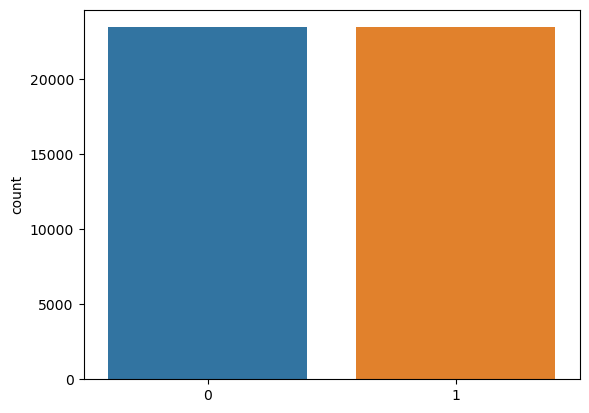

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=dependent_feature)
plt.show()


# Decision Tree

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

def tune_decision_tree_hyperparameters(X, y):
    param_dist = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        #'max_depth': range(0,1000,100),
        #'min_samples_split': range(0,1000,100),
        #'min_samples_leaf': range(0,1000,100),
        # 'max_features': ['auto', 'sqrt', 'log2'],
        #'max_leaf_nodes': range(0,1000,100),
        'class_weight': ['balanced', 'none'],
        
    }

    dt_classifier = DecisionTreeClassifier(random_state=42)
    random_search = RandomizedSearchCV(dt_classifier, param_dist, cv=5, scoring='accuracy', n_iter=100, random_state=42)
    random_search.fit(X, y)

    results_df = pd.DataFrame(random_search.cv_results_)


    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Best Accuracy: {random_search.best_score_}")
    return results_df

# Assuming X_train and y_train are available
result=tune_decision_tree_hyperparameters(X_train, y_train)


/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nalin21478/minic

Best Hyperparameters: {'criterion': 'entropy', 'class_weight': 'balanced'}
Best Accuracy: 0.8654312758298893


# Random Forest

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

def tune_random_forest_hyperparameters(X, y):
    param_dist = {
        'n_estimators': range(0,2000,100),
        'criterion': ['gini', 'entropy'],
        'max_depth': range(0,2000,100),
        'min_samples_split': range(0,2000,100),
        'min_samples_leaf': range(0,2000,100),
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False],
        'max_samples': [0.5, 0.7, 0.9],
        'class_weight': ['balanced', 'balanced_subsample', None]
    }

    rf_classifier = RandomForestClassifier(random_state=42)
    random_search = RandomizedSearchCV(rf_classifier, param_dist, cv=5, scoring='accuracy', n_iter=100, random_state=42)
    random_search.fit(X, y)


    results_df = pd.DataFrame(random_search.cv_results_)


    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Best Accuracy: {random_search.best_score_}")
    return results_df


result=tune_random_forest_hyperparameters(X_train, y_train)


/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

Best Hyperparameters: {'n_estimators': 1700, 'min_samples_split': 800, 'min_samples_leaf': 300, 'max_samples': 0.9, 'max_features': 'auto', 'max_depth': 1900, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}
Best Accuracy: 0.7329956005865885


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

def tune_random_forest_hyperparameters(X, y):
    param_dist = {
        'n_estimators': range(0,1000,100),
        'criterion': ['gini', 'entropy'],
        'max_depth': range(0,1000,100),
        'min_samples_split': range(0,1000,100),
        'min_samples_leaf': range(0,1000,100),
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False],
        #'max_samples': [0.5, 0.7, 0.9],
        'class_weight': ['balanced', 'balanced_subsample', None]
    }

    rf_classifier = RandomForestClassifier(random_state=42)
    random_search = RandomizedSearchCV(rf_classifier, param_dist, cv=5, scoring='accuracy', n_iter=100, random_state=42)
    random_search.fit(X, y)


    results_df = pd.DataFrame(random_search.cv_results_)


    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Best Accuracy: {random_search.best_score_}")
    return results_df


result=tune_random_forest_hyperparameters(X_train, y_train)


/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

Best Hyperparameters: {'n_estimators': 700, 'min_samples_split': 600, 'min_samples_leaf': 800, 'max_features': 'log2', 'max_depth': 800, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}
Best Accuracy: 0.8656916130550052


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

def tune_random_forest_hyperparameters(X, y):
    param_dist = {
        'n_estimators': range(0,1000,100),
        'criterion': ['gini', 'entropy'],
        'max_depth': range(0,1000,100),
        'min_samples_split': range(0,1000,100),
        'min_samples_leaf': range(0,1000,100),
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False],
        'max_samples': [0.5, 0.7, 0.9],
        #'class_weight': ['balanced', 'balanced_subsample', None]
    }

    rf_classifier = RandomForestClassifier(random_state=42)
    random_search = RandomizedSearchCV(rf_classifier, param_dist, cv=5, scoring='accuracy', n_iter=100, random_state=42)
    random_search.fit(X, y)


    results_df = pd.DataFrame(random_search.cv_results_)


    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Best Accuracy: {random_search.best_score_}")
    return results_df


result=tune_random_forest_hyperparameters(X_train, y_train)


/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

Best Hyperparameters: {'n_estimators': 800, 'min_samples_split': 500, 'min_samples_leaf': 900, 'max_samples': 0.7, 'max_features': 'sqrt', 'max_depth': 300, 'criterion': 'entropy', 'bootstrap': True}
Best Accuracy: 0.8656916130550052


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

def tune_random_forest_hyperparameters(X, y):
    param_dist = {
        'n_estimators': range(0,1000,100),
        'criterion': ['gini', 'entropy'],
        'max_depth': range(0,1000,100),
        'min_samples_split': range(0,1000,100),
        'min_samples_leaf': range(0,1000,100),
        'max_features': ['auto', 'sqrt', 'log2'],
        #'bootstrap': [True, False],
        #'max_samples': [0.5, 0.7, 0.9],
        #'class_weight': ['balanced', 'balanced_subsample', None]
    }

    rf_classifier = RandomForestClassifier(random_state=42)
    random_search = RandomizedSearchCV(rf_classifier, param_dist, cv=5, scoring='accuracy', n_iter=100, random_state=42)
    random_search.fit(X, y)


    results_df = pd.DataFrame(random_search.cv_results_)


    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Best Accuracy: {random_search.best_score_}")
    return results_df


result=tune_random_forest_hyperparameters(X_train, y_train)


/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 200, 'min_samples_leaf': 400, 'max_features': 'log2', 'max_depth': 800, 'criterion': 'entropy'}
Best Accuracy: 0.8656916130550052


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

def tune_random_forest_hyperparameters(X, y):
    param_dist = {
        'n_estimators': range(0,1000,100),
        'criterion': ['gini', 'entropy'],
       # 'max_depth': range(0,1000,100),
       # 'min_samples_split': range(0,1000,100),
       # 'min_samples_leaf': range(0,1000,100),
        #'max_features': ['auto', 'sqrt', 'log2'],
        #'bootstrap': [True, False],
       # 'max_samples': [0.5, 0.7, 0.9],
       # 'class_weight': ['balanced', 'balanced_subsample', None]
    }

    rf_classifier = RandomForestClassifier(random_state=42)
    random_search = RandomizedSearchCV(rf_classifier, param_dist, cv=5, scoring='accuracy', n_iter=100, random_state=42)
    random_search.fit(X, y)


    results_df = pd.DataFrame(random_search.cv_results_)


    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Best Accuracy: {random_search.best_score_}")
    return results_df


result=tune_random_forest_hyperparameters(X_train, y_train)


/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nalin21478/mi

Best Hyperparameters: {'n_estimators': 700, 'criterion': 'entropy'}
Best Accuracy: 0.8611701154307376


# KNN

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

def tune_knn_hyperparameters(X, y):
    param_dist = {
        'n_neighbors': np.arange(0, 2750), 
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': np.arange(0, 2750),  
        'p': [1, 2],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
    }

    knn_classifier = KNeighborsClassifier()
    random_search = RandomizedSearchCV(
        knn_classifier, param_distributions=param_dist, n_iter=1000, cv=5, scoring='accuracy', random_state=42
    )
    random_search.fit(X, y)

    # Store results in a DataFrame
    results_df = pd.DataFrame(random_search.cv_results_)

    # Save results to a CSV file

    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Best Accuracy: {random_search.best_score_}")
    return results_df

# Assuming X_train and y_train are available
result=tune_knn_hyperparameters(X_train, y_train)


# Logistic Regression

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import pandas as pd

def tune_logistic_regression_hyperparameters(X, y):
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        # 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        # 'multi_class': ['ovr', 'multinomial'],
        # 'max_iter': [100, 200, 300]
    }

    lr_classifier = LogisticRegression(random_state=42)
    grid_search = RandomizedSearchCV(lr_classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)


    results_df = pd.DataFrame(grid_search.cv_results_)



    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Best Accuracy: {grid_search.best_score_}")


tune_logistic_regression_hyperparameters(X_train, y_train)


/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Best Hyperparameters: {'penalty': 'l2', 'C': 100}
Best Accuracy: 0.5873083588854818


/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd

def tune_adaboost_hyperparameters(X, y):
    param_dist = {
        'n_estimators': range(50, 1000, 50),
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'algorithm': ['SAMME', 'SAMME.R'],
        'base_estimator': [None],  # Add your base estimator choices here
        'random_state': [42],  # You can change the random_state if desired
    }

    ada_classifier = AdaBoostClassifier()
    random_search = RandomizedSearchCV(ada_classifier, param_dist, cv=5, scoring='accuracy', n_iter=100, random_state=42)
    random_search.fit(X, y)

    results_df = pd.DataFrame(random_search.cv_results_)


    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Best Accuracy: {random_search.best_score_}")

# Assuming X_train and y_train are available
tune_adaboost_hyperparameters(X_train, y_train)


ValueError: 
All the 500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py", line 124, in fit
    self._validate_params()
  File "/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'base_estimator' parameter of AdaBoostClassifier must be an object implementing 'fit' and 'predict' or a str among {'deprecated'}. Got None instead.


# MLP

In [8]:
from sklearn.neural_network import MLPClassifier
def tune_mlp_hyperparameters(X, y):
    param_dist = {
        'hidden_layer_sizes': [(10,),(10,10),(10,10,10),(50,), (50, 50), (100,), (100, 100), (50, 50, 50), (100, 100, 100),(200,200,200),(200,200),(200,)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'lbfgs', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant','invscaling','adaptive'],
    }

    mlp_classifier = MLPClassifier(max_iter=100)
    random_search = RandomizedSearchCV(mlp_classifier, param_dist, cv=5, scoring='accuracy', n_iter=100, random_state=42)
    random_search.fit(X, y)

    results_df = pd.DataFrame(random_search.cv_results_)

    results_df.to_csv('hyperparameter_tuning_results_random_mlp.csv', index=False)

    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Best Accuracy: {random_search.best_score_}")
tune_mlp_hyperparameters(X_train, y_train)

/home/nalin21478/BTP/ML-food-Processing/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nalin21478/BTP/ML-food-Processing/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nalin21478/BTP/ML-food-Processing/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nalin21478/BTP/ML-food-Processing/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and 

Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (200, 200, 200), 'alpha': 0.0001, 'activation': 'tanh'}
Best Accuracy: 0.9619720653997259


/home/nalin21478/BTP/ML-food-Processing/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


# SVM

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import pandas as pd

def tune_svm_hyperparameters(X, y):
    param_dist = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4, 5],
        'coef0': [0.0, 0.1, 1.0],
        'shrinking': [True, False],
        'random_state': [42]  # You can change the random_state if desired
    }

    svm_classifier = SVC()
    random_search = RandomizedSearchCV(svm_classifier, param_dist, cv=5, scoring='accuracy', n_iter=100, random_state=42)
    random_search.fit(X, y)

    results_df = pd.DataFrame(random_search.cv_results_)

    results_df.to_csv('hyperparameter_tuning_results_random_svm.csv', index=False)

    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Best Accuracy: {random_search.best_score_}")

# Assuming X_train and y_train are available
tune_svm_hyperparameters(X_train, y_train)


KeyboardInterrupt: 

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(subsample=1.0, n_estimators=950, min_samples_split=16, min_samples_leaf=18, max_features='sqrt', max_depth=9, learning_rate=0.1)
print("GRADIENT BOOSTING CLASSIFIER \n")
evaluate_classifier_with_kfold(X_train, y_train, X_test, y_test, gb_classifier, num_folds=10)


GRADIENT BOOSTING CLASSIFIER 

Average Accuracy Train: 92.22727272727272
Accuracy Test: 88.91%
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.84      0.79        49
           2       1.00      0.38      0.56        13
           3       0.84      0.62      0.71        92
           4       0.91      0.97      0.94       396

    accuracy                           0.89       550
   macro avg       0.87      0.70      0.75       550
weighted avg       0.89      0.89      0.88       550

Confusion Matrix:
[[ 41   0   5   3]
 [  2   5   0   6]
 [  8   0  57  27]
 [  4   0   6 386]]


# XGBoost

In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

def tune_xgboost_hyperparameters(X, y):
    param_dist = {
        'max_depth': range(0,1000,100),
        'learning_rate': [0.01, 0.001, 0.1, 1, 10],
        'n_estimators': range(0,1000,100),
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'gamma': [0, 1, 2, 3, 4],
        'reg_alpha': [0, 0.1, 0.5, 1, 2],
        'reg_lambda': [0, 0.1, 0.5, 1, 2]
    }

    xgb_classifier = XGBClassifier(verbosity=0, eval_metric='logloss')
    random_search = RandomizedSearchCV(xgb_classifier, param_dist, cv=5, scoring='accuracy', n_iter=100, random_state=42)
    random_search.fit(X, y)

    results_df = pd.DataFrame(random_search.cv_results_)



    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Best Accuracy: {random_search.best_score_}")

tune_xgboost_hyperparameters(X_train, y_train)

/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nalin21478/miniconda3/lib/python3.11/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/nalin21478/miniconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = tr

Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 1, 'n_estimators': 800, 'max_depth': 900, 'learning_rate': 0.01, 'gamma': 2, 'colsample_bytree': 0.6}
Best Accuracy: 0.9273163578189575


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
import pandas as pd

def tune_naive_bayes_hyperparameters(X, y):
    param_dist = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
    }

    nb_classifier = GaussianNB()
    random_search = RandomizedSearchCV(nb_classifier, param_dist, cv=5, scoring='accuracy', n_iter=10, random_state=42)
    random_search.fit(X, y)

    results_df = pd.DataFrame(random_search.cv_results_)

    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Best Accuracy: {random_search.best_score_}")
    return results_df

# Assuming you have X_train and y_train defined
result = tune_naive_bayes_hyperparameters(X_train, y_train)


Best Hyperparameters: {'var_smoothing': 0.001}
Best Accuracy: 0.8660145444751913
